In [14]:
import numpy as np
from pathlib import Path
import xarray as xr
import holoviews as hv
import hvplot.xarray
from openpiv import pyprocess, tools


base_path = Path("data/openpiv")
im1 = str(base_path / "Substack-0001.tif")
im2 = str(base_path / "Substack-0003.tif")

frame_a = tools.imread(im1)
frame_b = tools.imread(im2)

# window params
window_size = 72
search_area_size = 72
overlap = 16

# estimate velocity field
U, V, snr = pyprocess.extended_search_area_piv(
    # np.invert(frame_b.astype(np.int32)), np.invert(frame_a.astype(np.int32)),
    frame_a.astype(np.int32),
    frame_b.astype(np.int32),
    window_size=window_size,
    search_area_size=search_area_size,
    overlap=overlap,
)
x, y = pyprocess.get_coordinates(
    image_size=frame_a.shape, search_area_size=search_area_size, overlap=overlap
)

# x, y coordinates from meshgrid
xs, ys = x[0], y[:, 0]

# calculate velocity vector magnitude & angle
mag = np.sqrt(U**2 + V**2)
angle = np.pi / 2 - np.arctan2(U / mag, V / mag)

# load velocity field into xarray
ds = xr.Dataset(
    {
        "mag": xr.DataArray(mag, dims=("y", "x"), coords={"y": ys, "x": xs}),
        "angle": xr.DataArray(angle, dims=("y", "x"), coords={"y": ys, "x": xs}),
        "rev_angle": xr.DataArray(
            angle + np.pi, dims=("y", "x"), coords={"y": ys, "x": xs}
        ),
        "u": xr.DataArray(U, dims=("y", "x"), coords={"y": ys, "x": xs}),
        "v": xr.DataArray(V, dims=("y", "x"), coords={"y": ys, "x": xs}),
    },
)

# image containers
bounds = (0, 0, frame_a.shape[1], frame_a.shape[0])
first_frame = hv.Image(frame_a, bounds=bounds).opts(title="Frame 0")
second_frame = hv.Image(frame_b, bounds=bounds).opts(title="Frame 1")

# vector fields
vector_field = ds.hvplot.vectorfield(
    x="x", y="y", angle="angle", mag="mag", hover=False
).opts(magnitude="mag", width=frame_b.shape[1], height=frame_b.shape[0])
reverse_vector_field = ds.hvplot.vectorfield(
    x="x", y="y", angle="rev_angle", mag="mag", hover=False
).opts(magnitude="mag", width=frame_b.shape[1], height=frame_b.shape[0])

# overlay vector fields on image
first_frame * vector_field + second_frame * reverse_vector_field


:Layout
   .Overlay.I  :Overlay
      .Image.I       :Image   [x,y]   (z)
      .VectorField.I :VectorField   [x,y]   (angle,mag)
   .Overlay.II :Overlay
      .Image.I       :Image   [x,y]   (z)
      .VectorField.I :VectorField   [x,y]   (rev_angle,mag)

In [15]:
from openpiv import windef

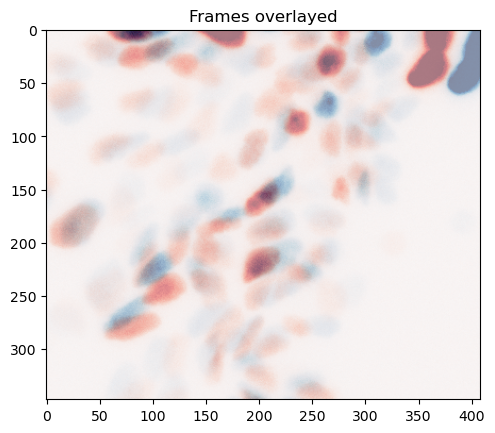

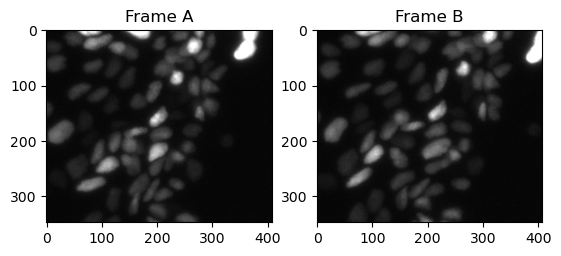

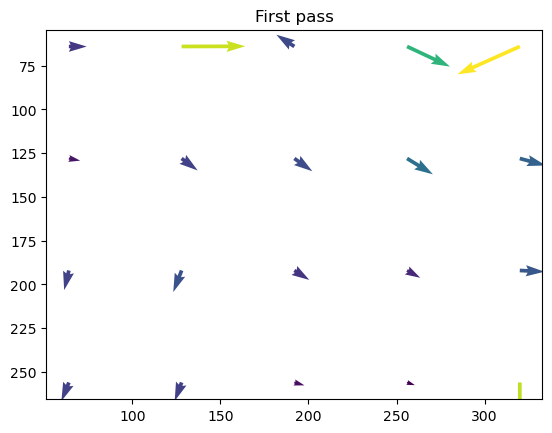

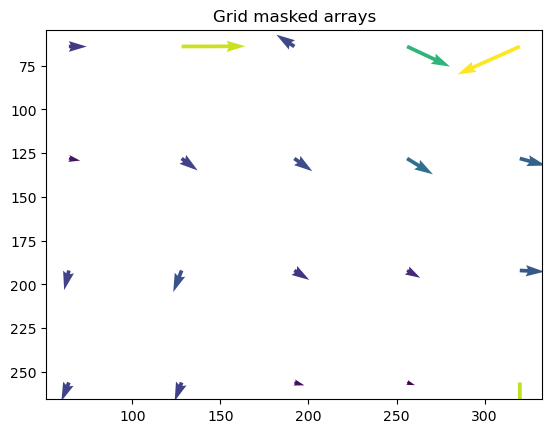

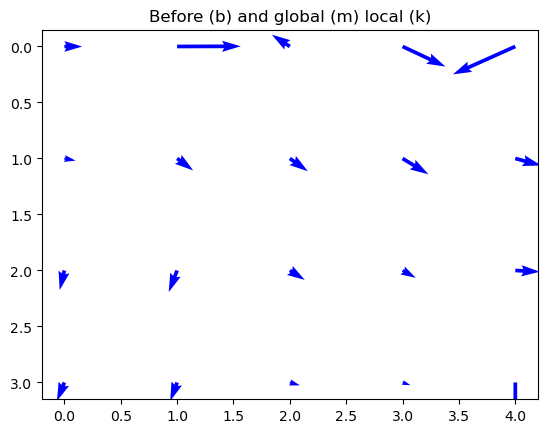

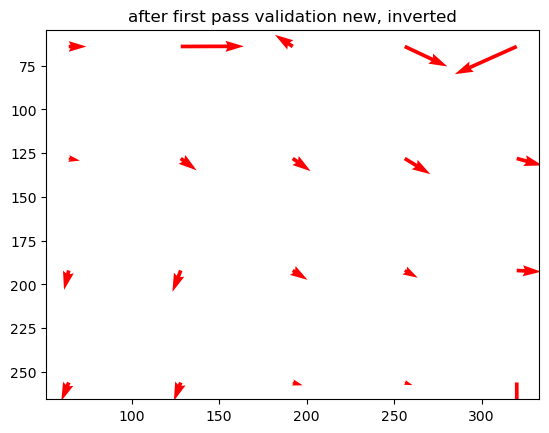

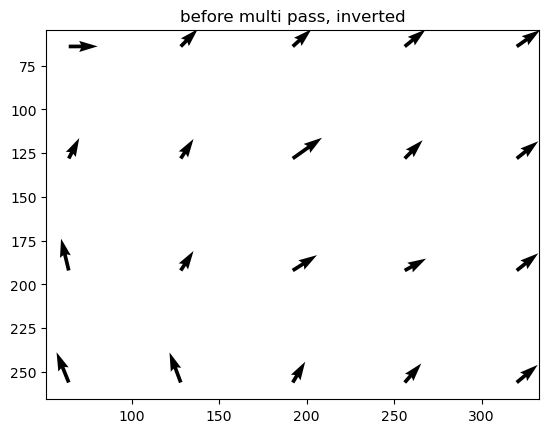

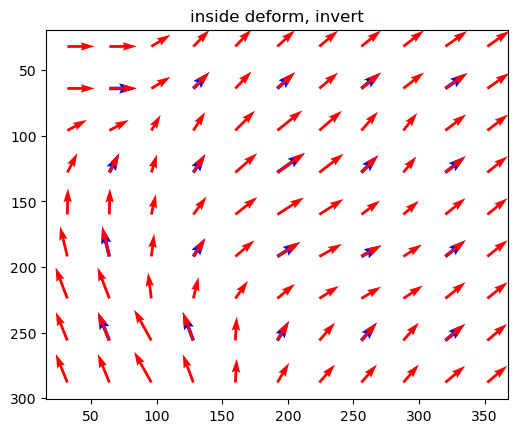

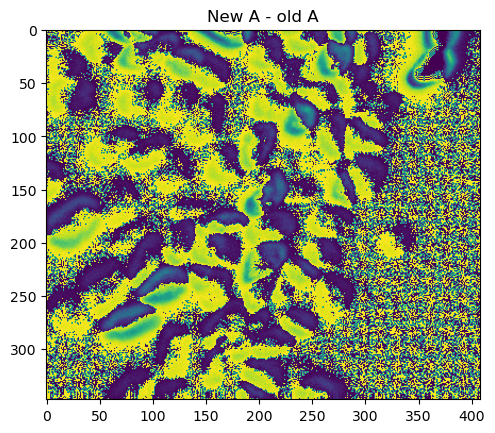

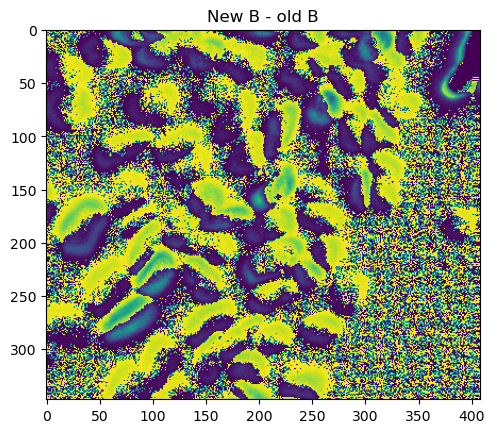

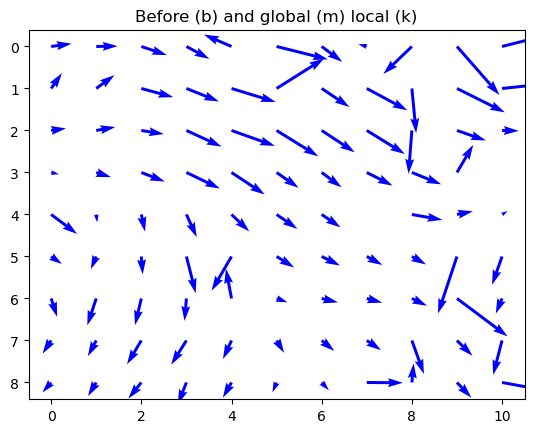

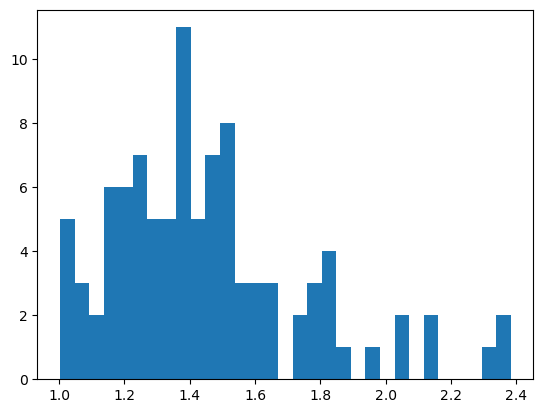

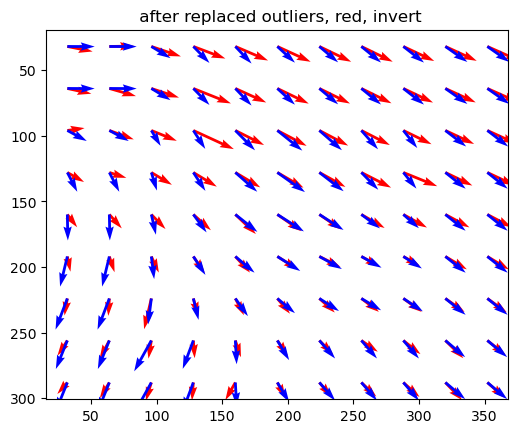

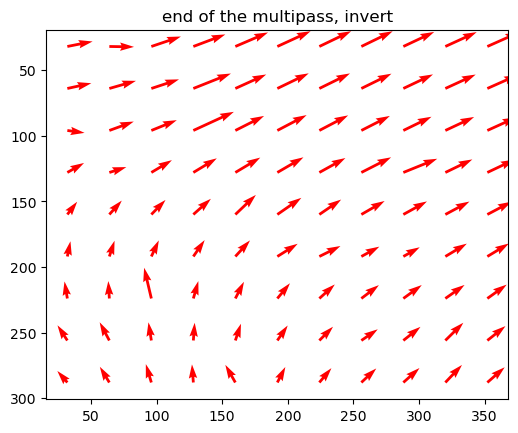

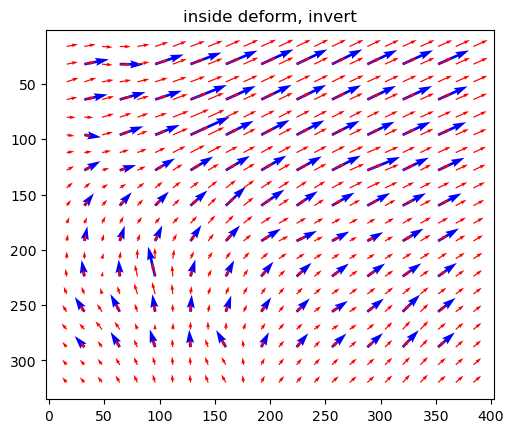

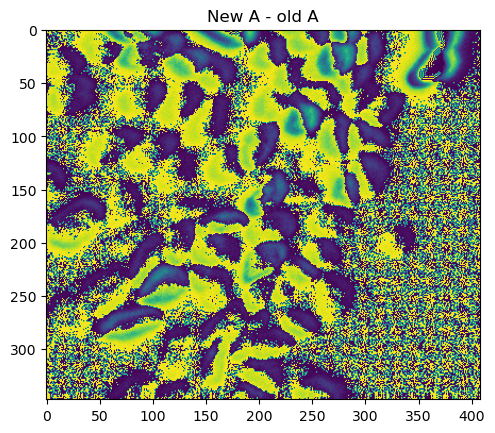

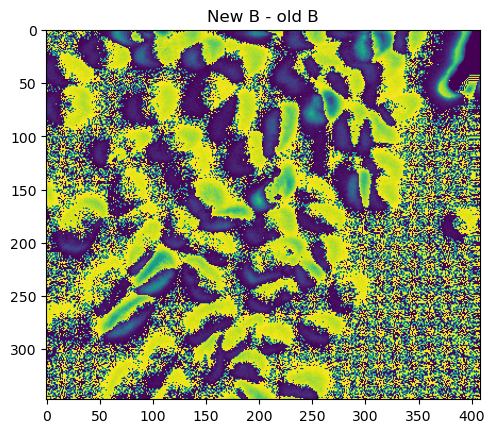

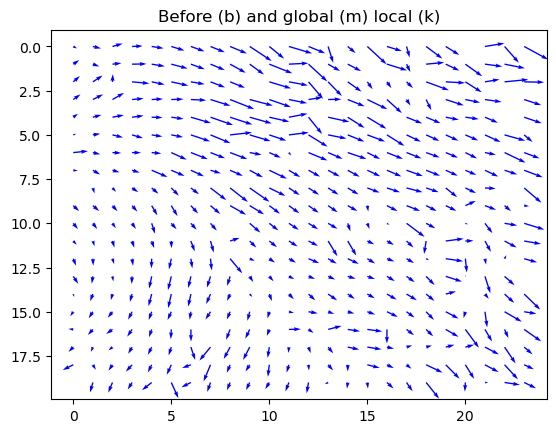

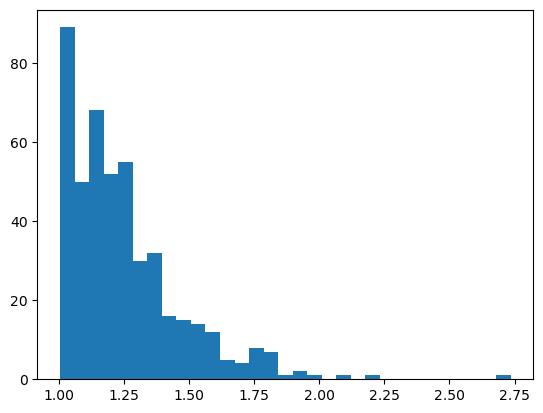

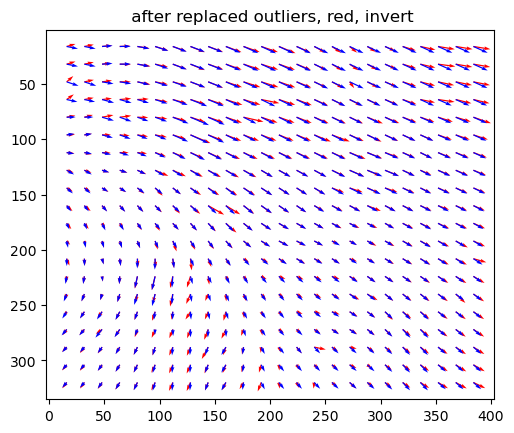

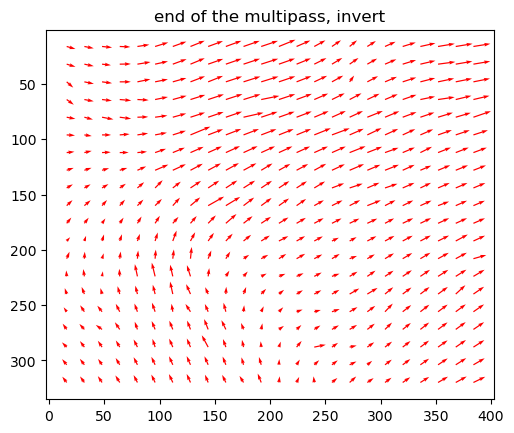

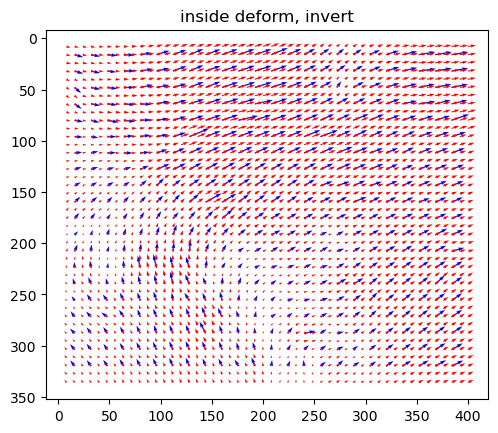

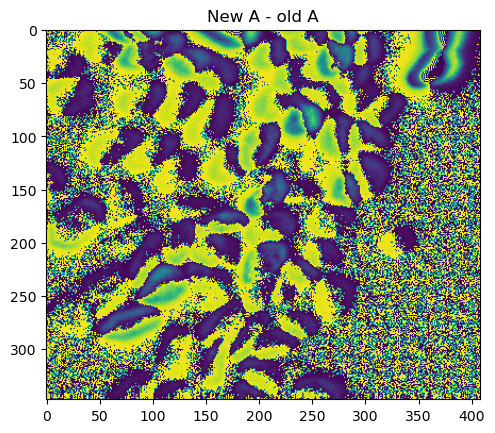

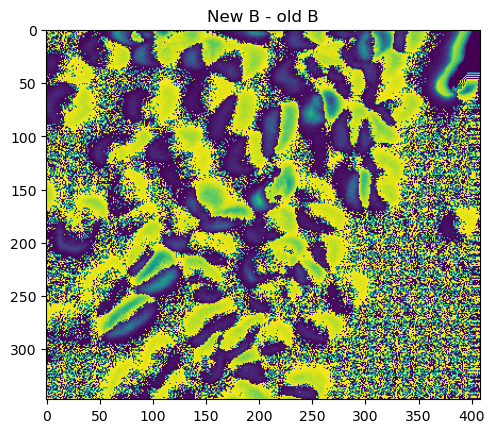

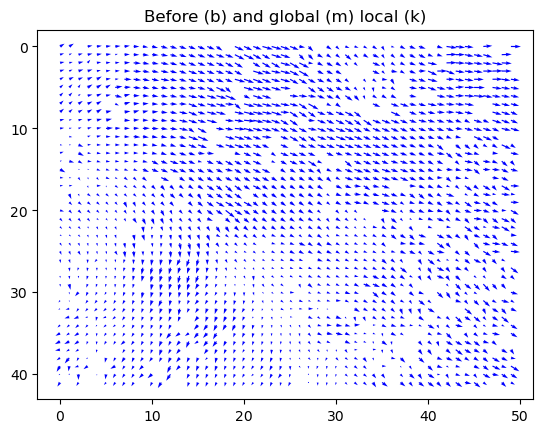

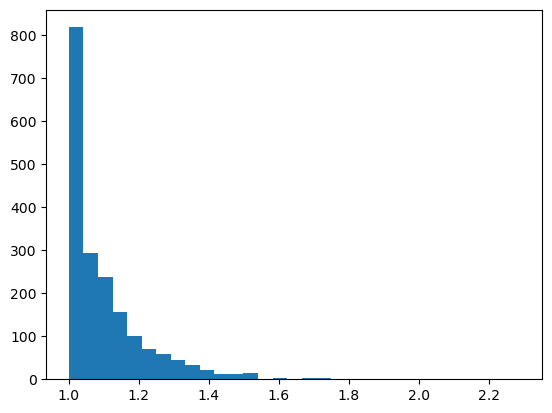

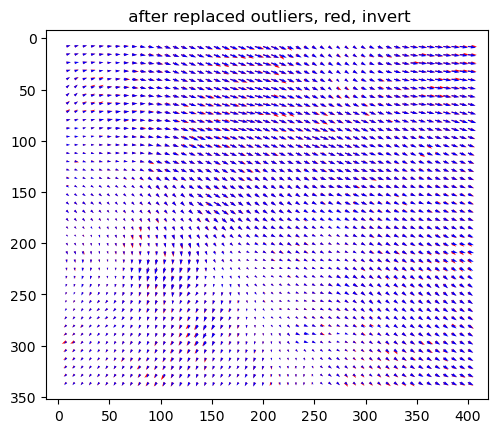

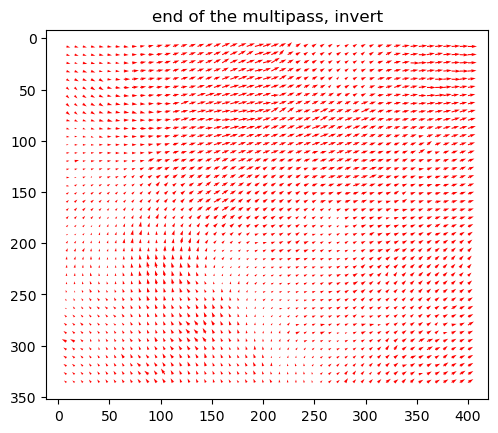

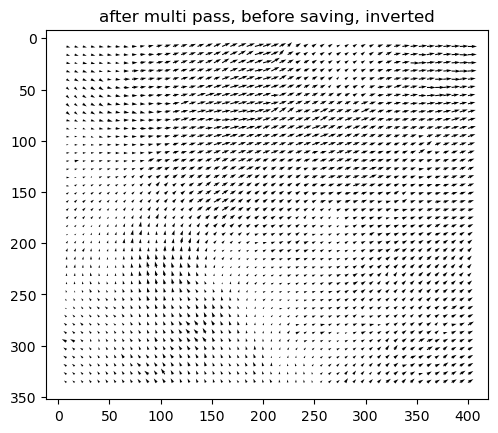

Saving to /home/user/Documents/repos/openpiv-python-poetry/openpiv/data/OpenPIV_results_16_test1/field_A0000.txt


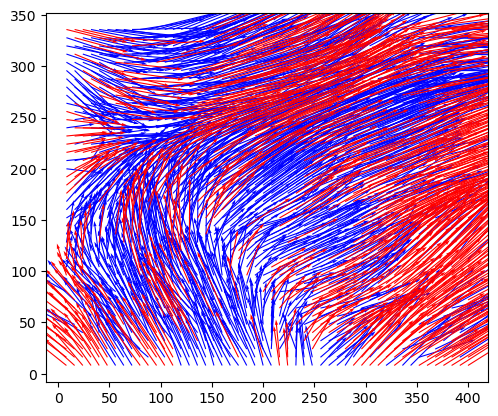

Image Pair 1
Substack-0001 Substack-0003


In [18]:
settings = windef.PIVSettings()
settings.num_iterations = 4
settings.windowsizes = (128, 64, 32, 16)
settings.overlap = (64, 32, 16, 8)
settings.filepath_images = base_path
settings.frame_pattern_a = "Substack-0001.tif"
settings.frame_pattern_b = "Substack-0003.tif"
settings.show_all_plots = True
settings.show_plot = True
windef.piv(settings)